# Week 1
Machine Learning is the science (and art) of **programming computers** so they can **learn from date**
- Predict prices for items based on its properties
- Distinguish spam emails from useful ones
- Handwriting/objects recognition
- Shopping recommendation

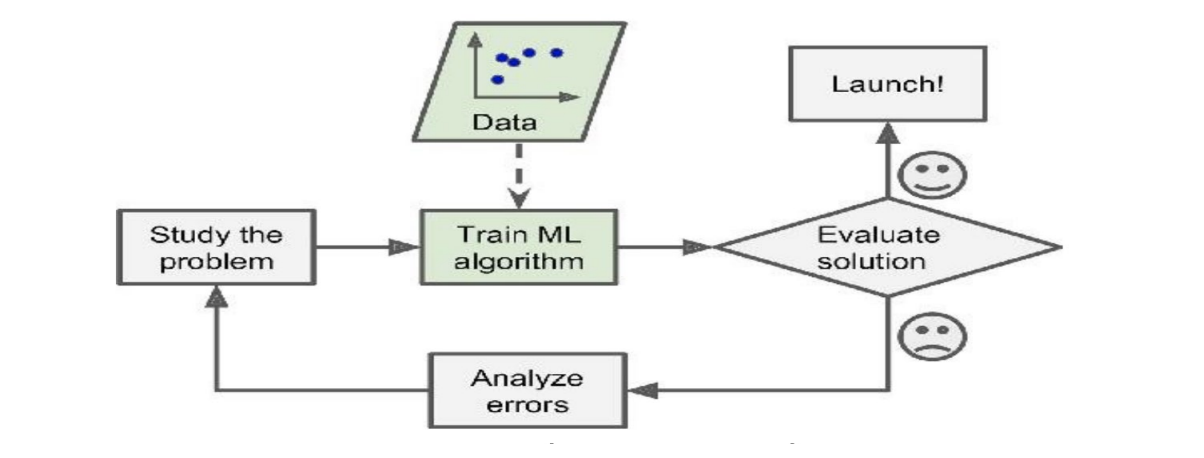

## 3 types of Machine Learning
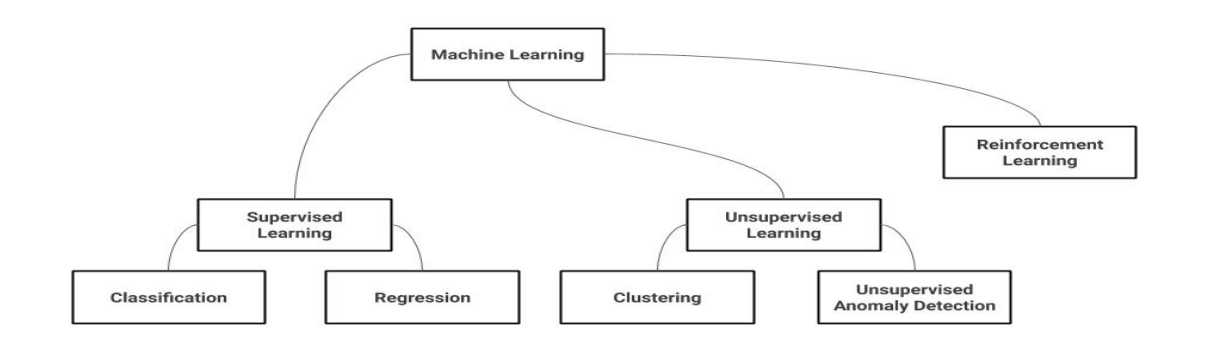

## Supervised learning
The main goal in supervised learning is to **teach a model from labeled training data** that allows us to **make prediction about unseen or future data**.
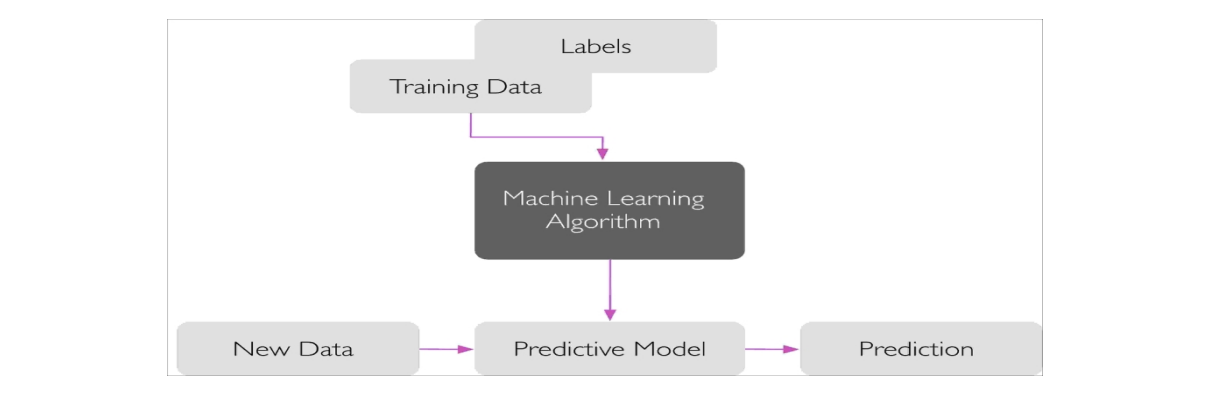
- Regression predict **continuous valued output**
- Classification predict **dicrete value output**
- **Summary:** labelled data, have feedback, predict future outcome

## Unsupervised learning
Unsupervised learning starts with training data without labels
- Clustering: grouping unlabelled data based on some connections. Try to put data samples into clusters that it **minimises the intracluster distances** (as similar as possible for samples within cluster) and **maximises the intercluster distances** (as different as possible for samples among clusters)
- Manifold learning (MAL): seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces
- **Summary:** no labelled data, no feedback, find hidden structues in data

## Reinforcement learning
- Observe the environment, select and perform actions
- Get penalties and rewards in return
- Learn by itself what is the best strategy to get the most reward over time
- **Summary:** no labels, reward system, learn from series of actions

##################################################################

# Week 2: Gradient Descent
- All the parameters in $\theta$ are initialised randomly
- Improve the estimates by iteractive incremental steps
- Steps are taken towards the descending slope
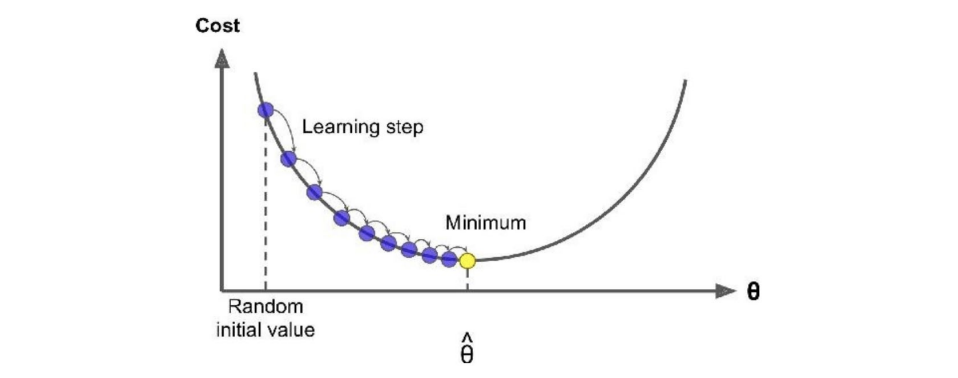

### Learning Rate
- A critical parameter in gradient descent (GD)
- If it's too small, take more iterations to converge
- If it's too big, make it diverge, skiping the minimum
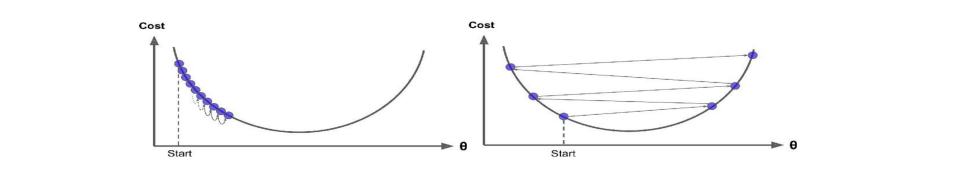
- But it's not always a perfect bowl shape
- These irregularities make convergence difficult
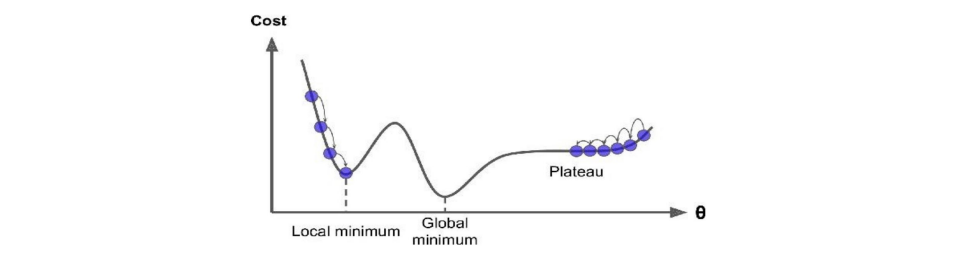
- Linear Regression of MSE is always a nice bowl shape
- Local minimum is also global minimum so GD is guaranteed to approach towards the global minimum *provided the learning rate is not too high*

### Batch Gradient Descent
- Computes the gradient of the loss function using the entire training dataset.
- $Gradients = \nabla_{\theta}MSE(\theta) = \frac{2}{m}X^T.(X . \theta - y)$ with $X$ include the column of 1
- After calculate every, consider moving in which way towards to the minimum
- As a result new $\theta$ need to be calculate using the learning rate $\eta$ (size of downhill step)
- $\theta^{next step} = \theta - \eta Gradients = \theta - \eta \nabla_{\theta}MSE(\theta) = \theta - \eta \frac{2}{m}X^T.(X . \theta - y)$
- Good because all is taken into consideration but it is **not appropriate for the huge dataset**

In [9]:
X = 2 * np.random.rand(100,1) # 100 row, 1 column, value from 0 to 1
y = 4 + 3*X + np.random.randn(100,1) # 100 row, 1 column, value from 0 to 1
X_b = np.c_[np.ones((100,1)), X] # Add a column of "1" in the left, this will be used for intercept

In [96]:
eta = 0.1 #learning rate
n_iterations = 1000
m = len(X_b)

theta = np.random.randn(2,1) #Random initialisation

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

print(theta)

[[4.00373971]
 [2.97589984]]


### Stochastic Gradient Descent
- It is oppsite with the Batch GD
- Just **choose a random instance** in the training set to calculate the gradients and find best theta
- Make the algorithm much **faster on large datasets**
- Drawbacks: when the cost function is irregular, the algorithm can escape the local minima

In [15]:
X = 2 * np.random.rand(100,1) # 100 row, 1 column, value from 0 to 1
y = 4 + 3*X + np.random.randn(100,1) # 100 row, 1 column, value from 0 to 1
X_b = np.c_[np.ones((100,1)), X] # Add a column of "1" in the left, this will be used for intercept

In [31]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters
m = len(X_b)

def learning_schedule(t):
    return t0 / (t+t1) # Reduce learning rate by time (when increase t)

theta = np.random.randn(2,1) # Random initialisation

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1] # Using 1 random instance
        yi = y[random_index: random_index + 1]   # Using 1 random instance
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  
        # Same with Batch GD (Dont need to divided by m because only use 1 instance)
        
        eta = learning_schedule(epoch*m + i) # Update (Reduce) learning rate
        theta = theta - eta*gradients # Update new theta

print(theta) #Final beta (as closest to the best as possible)

[[4.45591615]
 [2.68914642]]


### Stochastic Gradient Descent (Using scikit-learn)

In [33]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1)

sgd_reg.fit(X, y.ravel()) #ravel() flatten the array
            # Use directly X and y. Only need to flatten y (1 row with most column)
sgd_reg.intercept_, sgd_reg.coef_

(array([4.50202872]), array([2.64592039]))

### Mini-batch Gradient Descent
- Between Batch and Stochastic GD
- At each step, the gradient vector can be computed from a random subset of the training set instead of the whole batch of a single instance
- (Usually small) random subset instances are called mini-batch

##################################################################

# Week 2: Regression
- Linear Regression: $y = \alpha + \beta x$
- General form: $y_{predict} = \alpha.1 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$ with $\alpha$ is intercept $\beta$ is slope
- Vector form: $y_{predict} = h_{\theta}(x) = 	\theta . x = \theta^T . x$ with $\theta$ includes $\alpha$, $\beta$ and $x$ contains all attributes followed by $x_0 = 1$ **(With x0 is a column, different from practical exercise)**. It's more likely $c(np.ones,x).\theta$
- Best $\theta = (X^T . X)^{-1} . X^T . y$, which minimise the cost function MSE

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
X = 2 * np.random.rand(100,1) # 100 row, 1 column, value from 0 to 1
y = 4 + 3*X + np.random.randn(100,1) # 100 row, 1 column, value from 0 to 1

In [23]:
# Compute (best) theta
X_b = np.c_[np.ones((100,1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best) # Different from above due to noises

[[3.89552353]
 [3.04880403]]


In [46]:
# 1st way of predicting data
X_new = np.array([[0], [2], [1.2]])  # Value must be store in numpy array
X_new_b = np.c_[np.ones((3,1)), X_new] # Add column of 1 for the intercept
y_predict = X_new_b.dot(theta_best) # Above (third formula)
print(y_predict)

[[3.89552353]
 [9.9931316 ]
 [7.55408837]]


In [51]:
# 2nd way of predicting data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.predict(X_new))

[[3.89552353]
 [9.9931316 ]
 [7.55408837]]


In [66]:
# Another way to get best theta
print(lin_reg.intercept_) # intercept
print(lin_reg.coef_) # slope

[3.89552353]
[[3.04880403]]


##################################################################

# Week 3: Classification
Define which class the instances should be assigned to (two or more classes)
- Spam or non-spam emails
- Fraud or real transactions
- Hand-writting digits and letters
- Automatically grading system

## Logistic Regression
- A way of using some regression algorithms for classification
- Logistic regression outputs **probability margins**, between 0 and 1, for estimating membership to a particular class.
- The number $\hat{y} = \theta^T.x$ **(Same as Linear regression)** (or sometimes $c(np.ones,x).\theta$) gets transformed to probability $\hat{p}$ via a function, such $0 < \sigma(t) < 1$
- Then, classification is thus based on this probability
- And $\sigma(t) = \frac{1}{1+e^{-t}}$ and $\hat{p} = \sigma(t) = \frac{1}{1+e^{-\theta^T.x}}$ and $t = y = \theta^T.x$ (or sometimes $c(np.ones,x).\theta$)

### Prediction
- Predict whether an instance $x$ belongs to a particular class by setting probability thresholds (usually 0.5)
- $\hat{p} < 0.5 \Longrightarrow \hat{y} = 0$ or $\hat{p} \geqslant 0.5 \Longrightarrow \hat{y} = 1$

### Cost function for a single training instance
- Measure how far the predicted probability $\hat{p}$ is, from the **actual class label $(y)$** using the following formula with $c(\theta)$ is cost for each instance: $$y = 1 \Longrightarrow c(\theta) = -\log(\hat{p})$$ or $$y = 0 \Longrightarrow c(\theta) = -\log(1 - \hat{p})$$

### Log loss function
- The cost function over the whole training set is the average cost over all training instances, which can be written in log loss function
- $$J(\theta) = -\frac{1}{m} \Sigma^{m}_{i=1} [y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})]$$
- Need to find $\theta$ to make $J(\theta)$ smallest
- But how to find? No formula, we need to try all combination until it's found
- But we can **utilise the gradient descent to find best theta (minimum cost function)**

#### Use gradient descend
- The partial derivative with respect to a parameter $\theta_j$ $$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \Sigma^{m}_{i=1}[\sigma(\theta^T.x) - y^{(i)}]{x_j}^{(i)}$$
- For each instance it computes the prediction error, multiplies it by the jth feature value, then computes the average over all training instances.
- Once having the gradient vector containing all the partial derivative, we can use it in the batch GD algorithm.
- Stochastic and mini-batch is also considered.
- Compare them with the linear regression.

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
from sklearn import datasets

iris = datasets.load_iris() # Load data
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [321]:
print(iris['feature_names']) # Use petal width (4th column)only
print(iris['target'])
print(iris['target_names'])  # Define that 2 is virginica

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [52]:
p_width = iris["data"][:, 3:] # Extract that petal width column

virginica = (iris['target'] == 2) # change into T/F value. Virginica (2) = TRUE
virginica = virginica.astype(np.int32) # Optional
# .astype(np.int32) change T/F value into numeric value (0/1)

In [ ]:
p_width
# Shape: (150, 1)

In [366]:
virginica
# Shape: (150, )

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [54]:
# TRAINING
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(p_width, virginica)

LogisticRegression()

In [351]:
X_new = np.linspace(0, 3, 1000) # Create 1000 values, with the same interval from 0 to 3
X_new = X_new.reshape(-1,1) # Change structure: -1 (as many rows as it can), 1 (column)

y_probability = log_reg.predict_proba(X_new) # Prediction

In [355]:
print(log_reg.classes_) # Print this to define the class of the column
print(y_probability)

[False  True]
[[9.99249051e-01 7.50949397e-04]
 [9.99239224e-01 7.60776030e-04]
 [9.99229269e-01 7.70731151e-04]
 ...
 [3.08499021e-03 9.96915010e-01]
 [3.04523414e-03 9.96954766e-01]
 [3.00598887e-03 9.96994011e-01]]


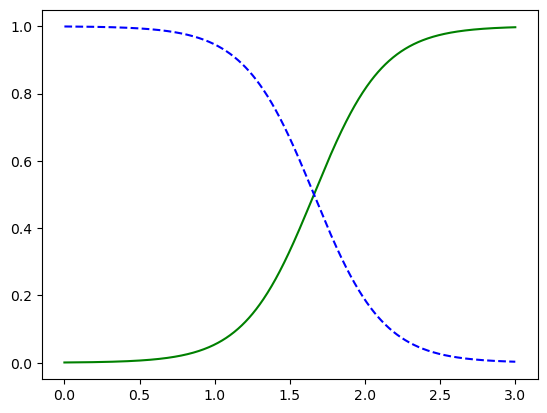

In [353]:
plt.plot(X_new, y_probability[:, 1], "g-", label = "Iris-Virginica")
plt.plot(X_new, y_probability[:, 0], "b--", label = "Not Iris-Virginica")

# Week 3: Multiclass Classification
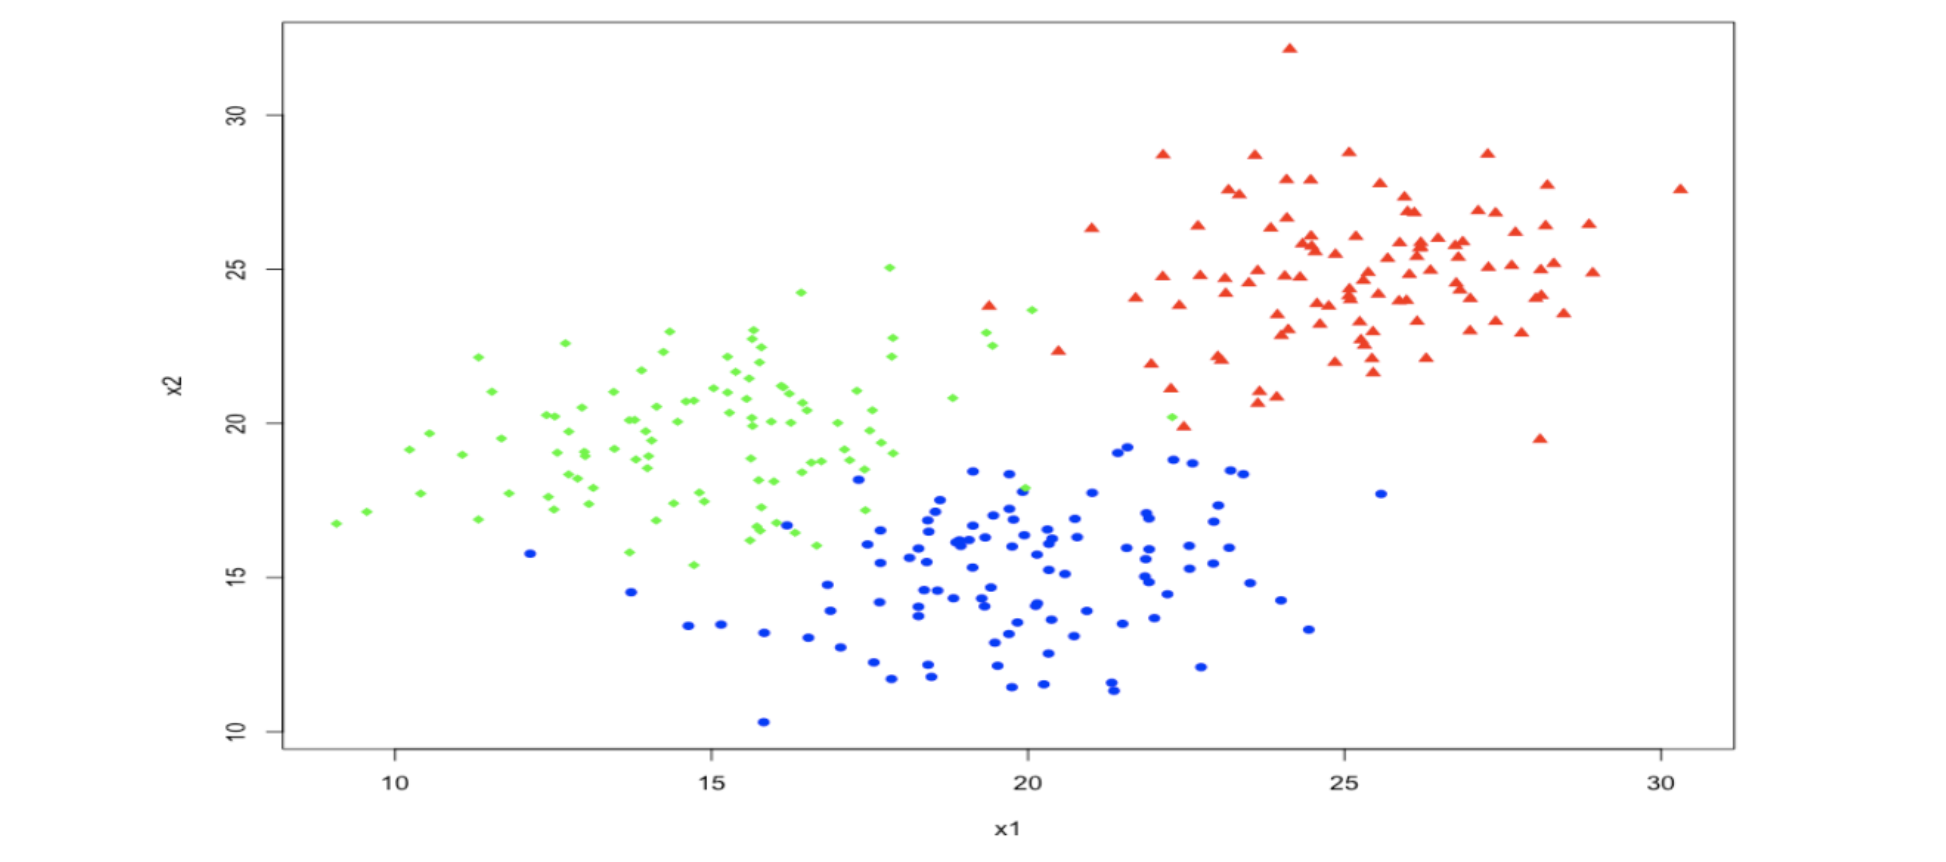
- Using binomial logistic regression
- Train a logistic regression classifier $f^{(i)}(x) = \hat{p} = \sigma(t) = \frac{1}{1+e^{-\theta^T.x}}$ for each class $i$ to predict the probability that $y = i$
- Use the classifier for prediction, for a new input $x$, select the class $max_{i}f^{(i)}(x)$
- Perform a prediction with each classifier

## Softmax Regression (biet thoi chu ko xai ly thuyet nhieu)
- It generalised **logistic regression** to multiclass without having to train and combine multiple logistic classifiers
- For a given number of classes $k$
- Given an instance $x$, softmax regression first computes a score via some function $s_k(x)$
- $s_k(x) = (\theta^{(k)})^T.x$ with $\theta^{(k)}$ is unique parameter vector for each class $k$. **This one outputs a score**

### To convert it to probability via softmax function
- $$\hat{p}_k = \sigma(s(x))_k = \frac{e^{(s_k(x))}}{\Sigma^{k}_{j=1}(e^{(s_j(x))})}$$

In [46]:
X = iris["data"][:, (2,3)] # Choose 3rd (petal length) and 4th column (petal width)
y = iris["target"] # All information of target, without converting into T/F

In [56]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [60]:
print(softmax_reg.classes_)
print(softmax_reg.predict_proba([[5, 2], [2,1]]))
# Result is the matching probability of that flower for each type

[0 1 2]
[[6.21626375e-07 5.73689803e-02 9.42630398e-01]
 [9.49034617e-01 5.09653797e-02 3.17386546e-09]]


In [416]:
softmax_reg.predict([[5, 2], [2,1]])
# Result is the column it belong to, based on the maximum of above result

array([2, 0])

##################################################################

## Week 3: Confusion Matrix
- It count the number of times instances of class A are classified as class B, for all A/B pairs
- First need to have a set of prediction so that they can be compared to the actual targets
- Each row in a confusion matrix represent an actual class
- Each column represents a predicted class
- A perfect classifier would only have true positives and true negatives
- Its confusion matrix would have nonzero value only on its main diagnoal (top left to bottom right
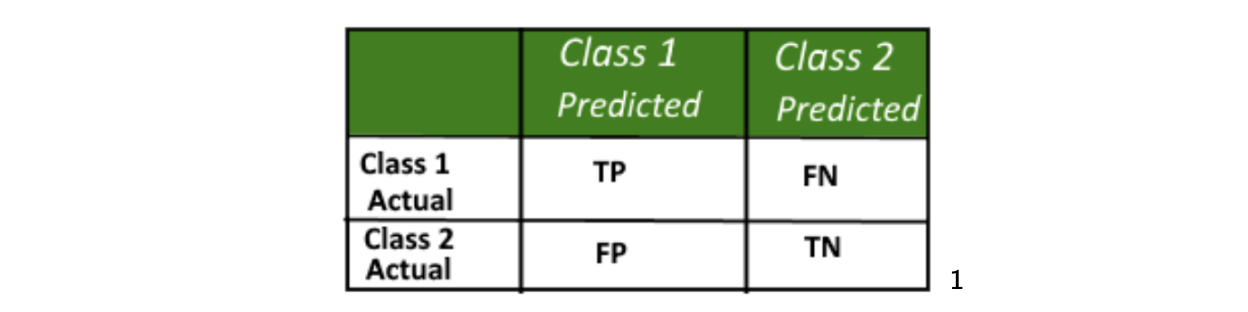


In [379]:
virginica_predict = log_reg.predict(p_width) # Validate the original data
print(virginica.sum())         # Number of actual Virginica
print(virginica_predict.sum()) # Number of predicted Virginica

50
48


In [387]:
from sklearn.metrics import confusion_matrix

confusion_matrix(virginica, virginica_predict) 
# Row: actual, Column: predicted

array([[98,  2],
       [ 4, 46]])

- Positive: The class that is of primary interest or the one that you are trying to detect **(Default setting: 1 will be the primary interest, in this case is Virginica)**
- Negative: The class that is not of primary interest or the one that is being distinguished from the positive class
- Precision of classifier $= \frac{TP}{TP + FP}$, $TP + FP$ is total predicted positives
- Recall (also called sensitivity or the true positive rate (TPR)) $= \frac{TP}{TP + FN}$, $TP + FN$ is total actual positives

In [390]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(virginica, virginica_predict)) # 46 / (46 + 2)
print(recall_score(virginica, virginica_predict))    # 46 / (46 + 4)

0.9583333333333334
0.92


##################################################################

# Week 4: Polynomial Regression
$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x^2_2 + \theta_n x^n_n$$

In [140]:
import numpy as np
import matplotlib.pyplot as plt

In [427]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
X = np.sort(X, axis = 0) # Just for easy visualisation
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

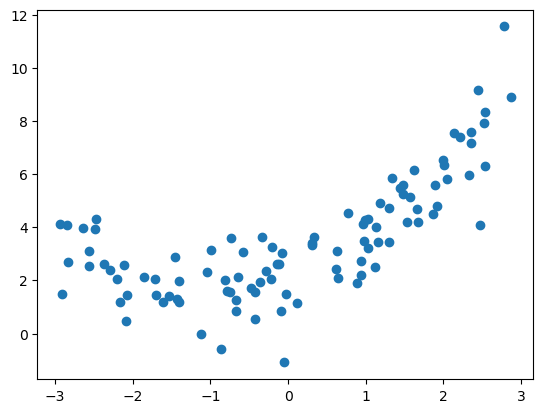

In [429]:
plt.scatter(X, y)

In [109]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X) 
# Include original X and X-squared, respectively

In [69]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [443]:
print(lin_reg.intercept_) # Intercept
print(lin_reg.coef_)      
# Slope, X then X-squared, respectively (Same as X_poly)

[2.1168657]
[[1.00147017 0.49735082]]


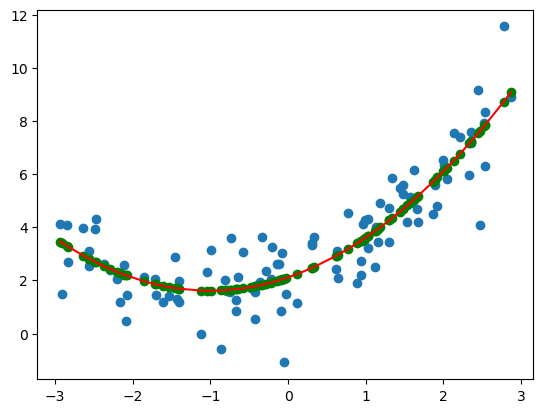

In [449]:
plt.plot(X, 2.1168657 + 1.00147017*X + (X**2)*0.49735082, color = 'red')
plt.scatter(X, y)
plt.scatter(X, lin_reg.predict(X_poly), color = 'green')

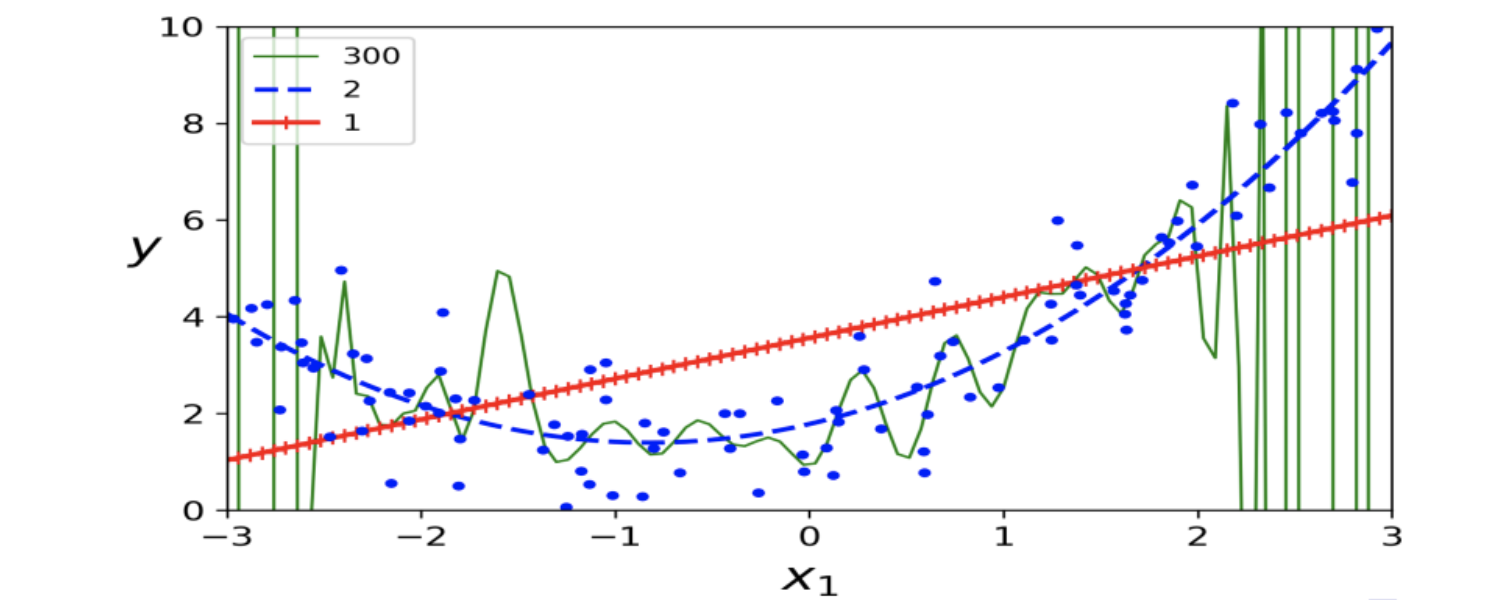
- Green line: 300-degree polynomial regression --> Overfitting --> Only fit the training set, not for prediction
- Red line: Just simple linear regression --> Underfitting
- Blue line: Good fit

##### 3 different generalisation errors:
- **Bias** (overly simplistic assumptions): not capturing the underlying patterns in the data (using linear instead of quadratic)
- **Variance** (Excessive sensitivity to small variations): model is too complicated, captures all noises
- **Irreducible error** (Due to noisiness of the data itself): i.e. Outliers, extreme values

##### Trade off
- Reduce bias, you often increase variance, and vice versa
- Increase a model’s complexity will typically increase its variance and reduce its bias, and vice versa
- **Goal:** Find a balance between creating models that are not *too simplistic and overly complex*

In [488]:
from sklearn.model_selection import cross_val_score
mse_scores = cross_val_score(lin_reg, X_poly, y, cv=10, scoring='neg_mean_squared_error')
print("Mean square error", mse_scores)
root_se_scores = np.sqrt(-mse_scores)
print("Root mean square error", root_se_scores) 
                    # The smaller the better, Compared to the original data

Mean square error [-1.49062385 -0.72486454 -1.25669687 -0.84241824 -1.86702391 -0.9502572
 -0.60782872 -0.8855681  -0.59717739 -2.75770544]
Root mean square error [1.22091107 0.85138977 1.12102492 0.91783345 1.36639083 0.97481137
 0.77963371 0.94104628 0.77277253 1.66063405]


#### Training set and validation set
- Use part of the training set for training and part of it for model validation
- Don’t touch the test set until you are ready to launch a model

#### K-fold cross-validation
- The idea is use as many small set (for validating) as possible
- Each model is evaluated once per validation set after it is trained on the rest of the data
- Averaging out the evaluations of model to get a much more accurate measure of its performance
- Drawback: time-consuming, multiplied by the number of validation sets

#### Step
- Split the training set into $k$ distinct subsets called **folds**
- Picking a different fold for each evaluation every time that train on the remaining $k-1$ folds
- Do it $k$ times
- The result is an array containing the $k$ evaluation scores, then calculate the average
- Typical split(Training, Validating, Testing = 80,10,10 or 50,25,25)

#### Learning Curve

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y): #3 arguments
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    # Randomly select: 20% for testing, 80% for training
    train_errors, val_errors = [], [] # Blank value to append 
    for m in range(1, len(X_train)+1): # 1-80th iterations
        # Train new model 80 times from 1 value until 80 value
        model.fit(X_train[:m], y_train[:m]) #1st iteration: 1 obs, 2nd iteration: 2 first obs ..., 80th iteration: 80 obs
        # Predict new value
        y_train_predict = model.predict(X_train[:m]) # Validate based on training set, m obs compared
        y_val_predict = model.predict(X_val) # Predict using testing set, (always) 20 obs compared
        # Compare the prediction to actual value
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) #error compared to training set
        val_errors.append(mean_squared_error(y_val, y_val_predict)) #error compared to testing set
    # Visualising
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="val")
    plt.xlabel("Number of training observations", fontsize=14)
    plt.ylabel("MSE", fontsize=14)

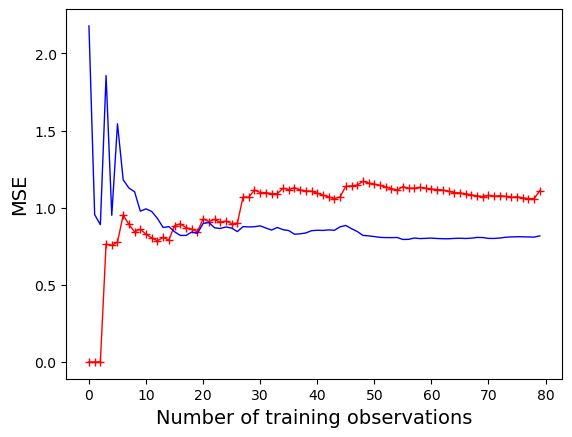

In [585]:
plot_learning_curves(lin_reg, X_poly, y)

### Explain
#### Training data
- Remaining at the lower level than below (being good fit but may leading to something overfitting)

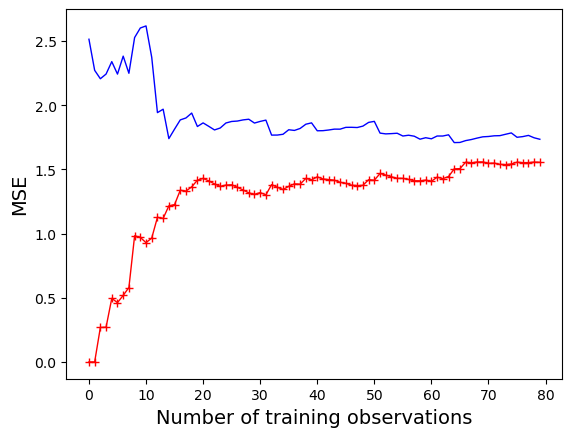

In [160]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)
plot_learning_curves(lin_reg, X , y) # Below graph is underfit because of only using linear regression for quadratic equation

### Explain
#### Training data
- zero error for initially, then error goes up until it reaches a plateau (flat/stable)
- zero error for initially (perfectly fit) due there is one 1-2 observations, essentially initial components of linear line
- More instance, gradually higher error, because the model get more noises

#### Testing/validating data
- big error initially, then error goes down until it reaches a plateau

### Comparison between 3
- **Underfit**: both lines come closer to each other **but stay constant**
- **Overfit**: extremely low in training set
- **Good fit**: both lines come close to each other and **go dowm together**

##################################################################

# Week 4: EXPECTED PREDICTION ERROR (EPE)
- Quantify the average prediction error of a model on **NEW, UNSEEN DATA**
- EPE provides insight on how well the model generalises to new data
- Can help in model selection and hyperparameter tuning
- EPE is often used to evaluate the performance of regression models

## Formula
- True model: $y = f_\theta(x) + \delta = \theta_0+\theta_1 x_1+...+\theta_n x_n + \delta$, with $\delta$ is the random noise
- Predicted model: $\hat{y} = \hat{f}_\hat{\theta}(x) = \hat{\theta_0}+\hat{\theta_1} x_1+...+\hat{\theta_n} x_n$
- EPE of regressor: $EPE = E[L(y, \hat{f}_\hat{\theta}(x))]$, with $L(y, \hat{f}_\hat{\theta}(x))$ is loss function, $L(y, \hat{f}_\hat{\theta}(x)) = (y-\hat{y})^2$ so $$EPE = E[(y-\hat{y})^2]$$

## Regularisation
- Constraining a model to make it simpler and reduce the risk of overfitting
- The more feature used, or the more complex the model is, the more overfitting the model is
- Regularisation adds a penalty to the cost function
- Regularisation put a constrant on the coefficients and weights of our model

### Regularisation by penalising
- Penalising the magnitude of coefficients of features $\theta_i$, while minimising error
- Add a penalty term to the loss function that consists of
  + A complexity parameter, $\lambda$
  + A function with all the coefficients of features, $P(\theta)$
  + i.e $L(y, \hat{f}) + \lambda P(\theta)$: is a **GENERAL FORM**
- Optimise the small cost AND also low complexity model
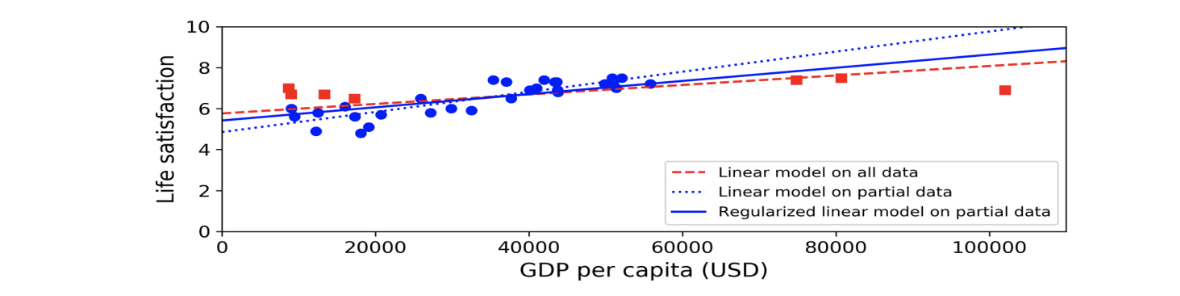

## Regularised Linear Models
- A good way to reduce overfitting is to regularise the model (constrain it by having fewer degrees of freedom)
- Ridge Regression and Lasso Regression are two regularised versions of Linear Regression
- A regularisation term equal to $\alpha \Sigma_{i = 1}^{n}$ is added to the cost function
- This forces the learning algorithm to not only fit the data but also keep the model weight as small as possible
- A regularisation term should only be added to cost function during training
- Once the model is trained, use the unregularised performance measure to evaluate the model's performance

### Ridge Regression
- Ridge Regression cost function $J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\Sigma_{i = 1}^{n}(\theta_i)^2$
- The hyperparameter $\alpha$ controls how much you want to regularise the model
- If $\alpha$ increase, the weights will get closer to zero and the result will become a flat line going through the data's mean
- Closed form equation $\hat{\theta} = (X^T.X+\alpha A)^{-1}.X^T.y$ with $A$ is the identity matrix
- **$\theta$ above does not include intercept** (Unconfirmed)
- **Only need to assign $\alpha$ (interchangably $\lambda$) and the machine will train the model itself**

In [164]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [736]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 3, solver = 'cholesky') #MEMORISE THIS ONE
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.85929611]])

In [717]:
lin_reg.fit(X, y)
lin_reg.predict([[1.5]])

array([[4.87415841]])

In [731]:
from sklearn.linear_model import SGDRegressor
sgd_reg2 = SGDRegressor(penalty = 'l2') #l2 (L2) Ridge
sgd_reg2.fit(X, y.ravel())
sgd_reg2.predict([[1.5]])

array([4.85474841])

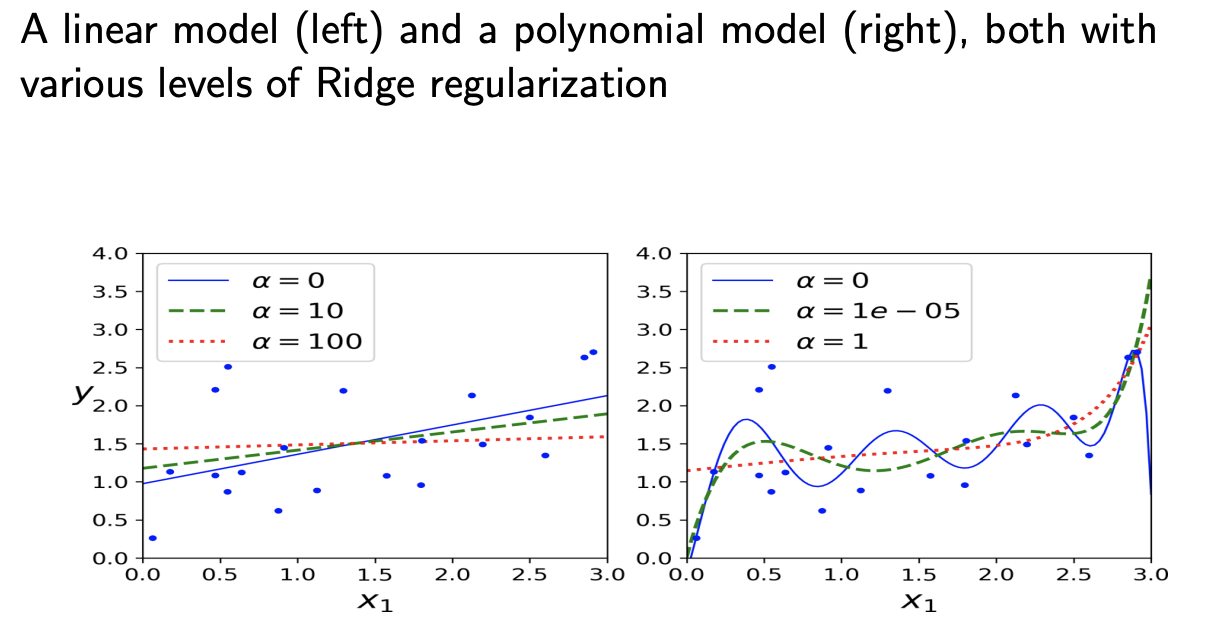

### Lasso Regression
- Main feature: tend to eliminate the weights of the least important features
- Regularistion term is an absolute value
- Cost function: $J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\Sigma_{i = 1}^{n}|\theta_i|$

In [721]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1) #Linear Regression, the bigger alpha the better
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.35209315])

In [729]:
from sklearn.linear_model import SGDRegressor
sgd_reg1 = SGDRegressor(penalty = 'l1') #l1 (L1) Lasso
sgd_reg1.fit(X, y.ravel())
sgd_reg1.predict([[1.5]])

array([4.84399842])

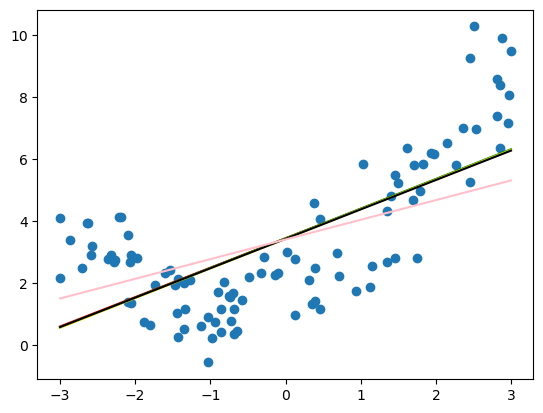

In [738]:
X_sort = np.sort(X, axis = 0)
plt.scatter(X,y)
plt.plot(X_sort, ridge_reg.predict(X_sort), color = 'red')
plt.plot(X_sort, lin_reg.predict(X_sort), color = 'green')
plt.plot(X_sort, sgd_reg2.predict(X_sort), color = 'yellow')
plt.plot(X_sort, sgd_reg1.predict(X_sort), color = 'black')
plt.plot(X_sort, lasso_reg.predict(X_sort), color = 'pink')

### Ridge
- includes all (or none) of the features
- perform better in prediction
- prevent overfitting, but not useful for data with huge dimensions (big data)
- for data with highly correlated features, generally works well, coefficients will be distributed among them
### Lasso
- performs feature selections, some coefficients become zero
- solution is sparse, useful for data with huge dimensions
- arbitrarily select any one feature among the correlated ones, chosen variable changes with model parameter

## Early Stopping
- A different way to regularise iterative learning algorithms such as DF is to stop training as soon as the validation error reaches a minimum
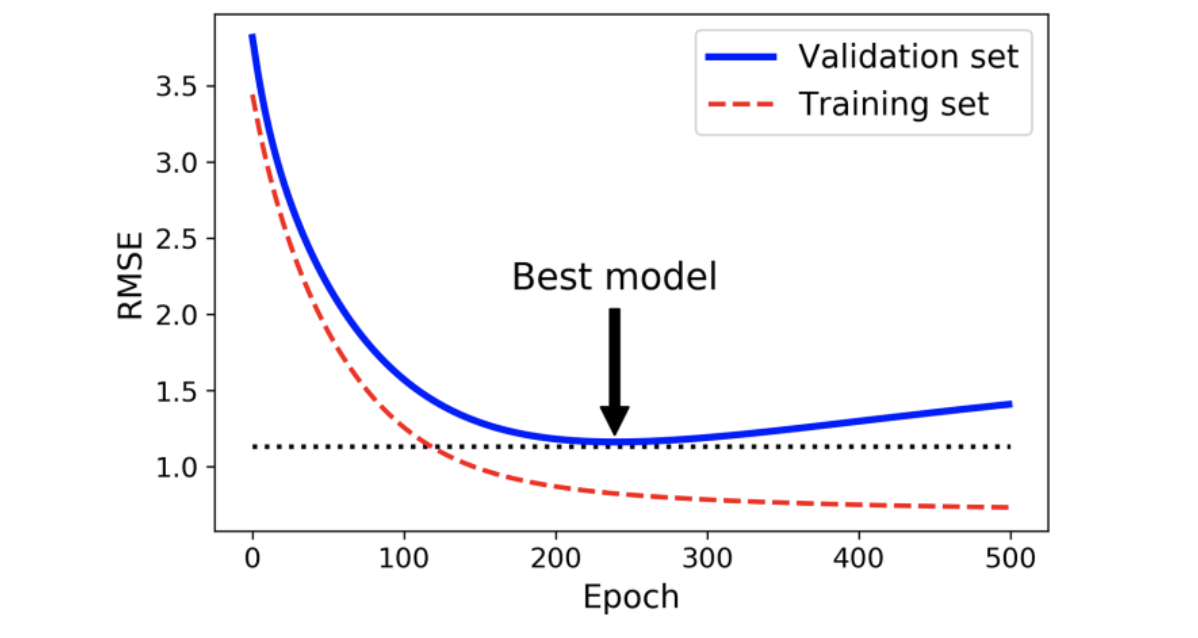
- After a while the validation error stops decreasing and starts increase back again
- This indicates that the model starts to overfit the training data
- With early stopping, we can stop when the validation error reaches the minimum
- Simple and efficient

In [214]:
############ Additional information ############
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình hồi quy Ridge
ridge = Ridge()

# Cấu hình dải giá trị alpha để thử nghiệm
alpha_values = [0.1, 1.0, 5.0, 7.0, 9, 11, 100.0]
parameters = {'alpha': alpha_values}

from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sử dụng GridSearchCV để tìm giá trị alpha tốt nhất
grid_search = GridSearchCV(ridge, parameters, cv=5, scoring='neg_mean_squared_error')

# Huấn luyện mô hình
grid_search.fit(X_train, y_train)

# In ra giá trị alpha tốt nhất và hệ số tương ứng
print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best coefficients: {grid_search.best_estimator_.coef_}")
print(f"Best intercept: {grid_search.best_estimator_.intercept_}")

# Dự đoán trên tập kiểm tra
y_pred = grid_search.best_estimator_.predict(X_test)

Best alpha: 5.0
Best coefficients: [[0.9848812]]
Best intercept: [3.62770753]


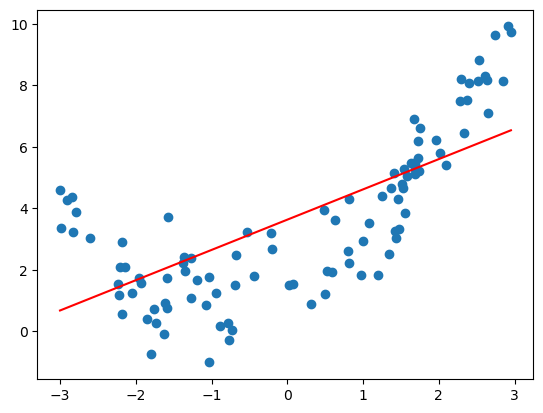

In [216]:
X_sort = np.sort(X, axis = 0)
plt.scatter(X,y)
plt.plot(X_sort, grid_search.predict(X_sort), color = 'red')